In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ICE4 = pd.read_csv('ICE44051.csv', index_col=0)
ICE4

,difficulty,interest
prediction,3.807692,4.326923
nlp,4.220000,4.431373
sna,3.769231,4.134615
neural,4.400000,4.490196
viz,4.060000,4.596154
loop,4.080000,4.431373
sql,3.693878,4.431373


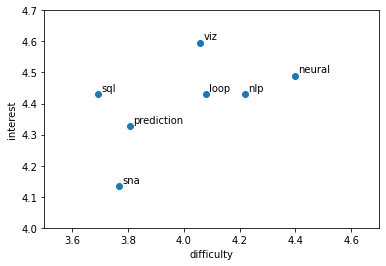

In [5]:
plt.scatter(ICE4.difficulty, ICE4.interest)

for i, index in enumerate (ICE4.index):
    plt.text(ICE4.difficulty[i]+0.01, ICE4.interest[i]+0.01, index)

plt.xlim (3.5, 4.7)
plt.ylim (4.0, 4.7)
plt.xlabel("difficulty")
plt.ylabel("interest");

In [6]:
import math

ICE4_distance = ICE4.copy()
ICE4_distance['distance'] = 0

item = ICE4_distance.loc['prediction',]

for i in ICE4_distance.index:
    target = ICE4_distance.loc[i,]
    d = math.dist(item, target)
    ICE4_distance.loc[i, 'distance'] = d

In [7]:
ICE4_distance.sort_values('distance', ascending=True)

,difficulty,interest,distance
prediction,3.807692,4.326923,0.000000
sql,3.693878,4.431373,0.154478
sna,3.769231,4.134615,0.196116
loop,4.080000,4.431373,0.291652
viz,4.060000,4.596154,0.368977
nlp,4.220000,4.431373,0.425332
neural,4.400000,4.490196,0.614399


In [8]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(ICE4)
cosine_sim

array([[1.        , 0.99922723, 0.99984605, 0.99856397, 0.99999823,
        0.99974724, 0.99964159],
       [0.99922723, 1.        , 0.99976308, 0.99989801, 0.99929948,
        0.99985835, 0.99781682],
       [0.99984605, 0.99976308, 1.        , 0.99935025, 0.99987732,
        0.99998782, 0.99901794],
       [0.99856397, 0.99989801, 0.99935025, 1.        , 0.99866309,
        0.999516  , 0.99677186],
       [0.99999823, 0.99929948, 0.99987732, 0.99866309, 1.        ,
        0.99978781, 0.99958939],
       [0.99974724, 0.99985835, 0.99998782, 0.999516  , 0.99978781,
        1.        , 0.99878705],
       [0.99964159, 0.99781682, 0.99901794, 0.99677186, 0.99958939,
        0.99878705, 1.        ]])

In [9]:
module_indices = pd.Series(range(len(ICE4.index)), index = ICE4.index)

module_indices

prediction    0
nlp           1
sna           2
neural        3
viz           4
loop          5
sql           6
dtype: int64

In [10]:
def get_recommendations(name, cosine_sim, matrix_indices):
    idx = matrix_indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    rank_indices = [i[0] for i in sim_scores]
    return matrix_indices.iloc[rank_indices]

In [11]:
get_recommendations("prediction", cosine_sim, module_indices)

viz     4
sna     2
loop    5
sql     6
nlp     1
dtype: int64